In [2]:
!pip install -qU python-gdcm pydicom pylibjpeg


In [1]:
import os
import math
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from tqdm.notebook import tqdm
import gc

import glob

#for dcm files
from joblib import Parallel, delayed
import pydicom

#for ROI model
import torch
import random


In [2]:
model = torch.hub.load('./yolov5', 'custom', path='breast cancer/rsna-roi-003.pt', source='local')

YOLOv5  2023-9-26 Python-3.10.13 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [3]:
file_list = glob.glob('D:/Ambis Kuliah/Semester 7/NAIST Internship/Breast Cancer Project/Program/Noises Inpainting/result train/*.png')

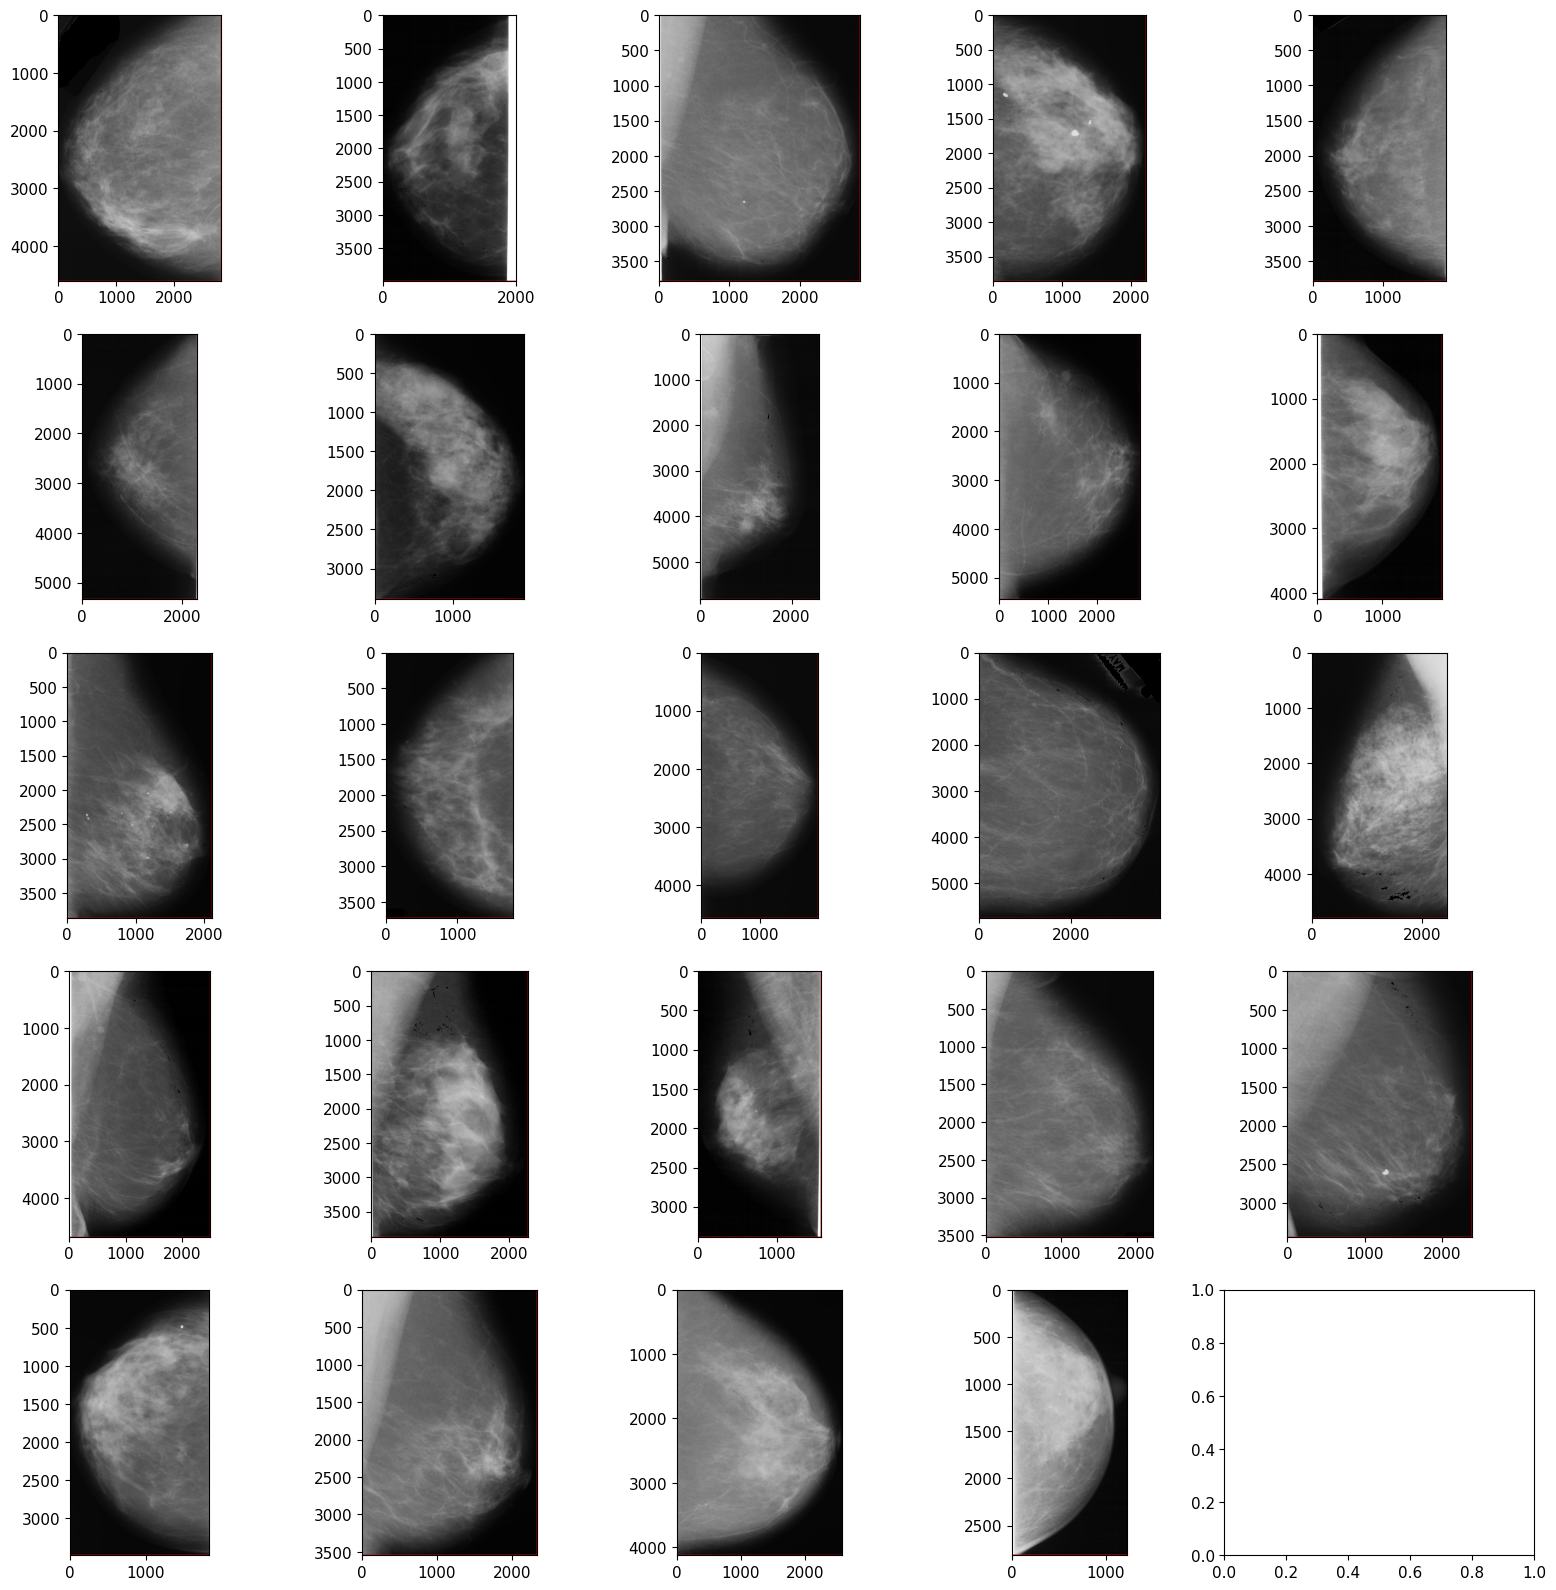

In [59]:
%matplotlib inline
images = []
cropped_images = []

for img_file in random.sample(file_list, 25):  

    frame = cv2.imread(img_file)
    detections = model(frame)
    
    results = detections.pandas().xyxy[0].to_dict(orient="records")
    for result in results:
        images.append(cv2.rectangle(frame, (int(result['xmin']), int(result['ymin'])), (int(result['xmax']), int(result['ymax'])), (255,0,0), 10))
        cropped_images.append(frame[int(result['ymin']):int(result['ymax']), int(result['xmin']):int(result['xmax'])])

# Plot result
fig, axes = plt.subplots(5, 5, figsize=(20,20))
    
for idx, image in enumerate(cropped_images):
    i = idx % 5 
    j = idx // 5 
    axes[i, j].imshow(image)

plt.subplots_adjust(wspace=0, hspace=.2)
plt.show()

In [ ]:
import time
import os
start_time = time.time()

output_folder = r'D:/Ambis Kuliah/Semester 7/NAIST Internship/Breast Cancer Project/Program/YOLO crop'

for img_file in file_list :
    frame = cv2.imread(img_file)
    detections = model(frame)
    
    img_filename = os.path.basename(img_file)
    for i, result in enumerate(results):
        cropped = frame[int(result['ymin']):int(result['ymax']), int(result['xmin']):int(result['xmax'])]
        
        img_filename = os.path.basename(img_file)
        cropped_filename = f"{os.path.splitext(img_filename)[0]}_crop_{i}.jpg"
        
        output_path = os.path.join(output_folder, cropped_filename)
        cv2.imwrite(output_path, cropped)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"elapsed time : {elapsed_time} sec")    

        